In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


In [2]:

# Creating BayesNet with 6 variables
bn=gum.BayesNet('SmokeAndFire')

n,y = "⊥", "⊤"

dom_b = [n,y]


bn.add(gum.LabelizedVariable('T','Tampering', dom_b))
bn.add(gum.LabelizedVariable('F','Fire',      dom_b))
bn.add(gum.LabelizedVariable('A','Alarm',     dom_b))
bn.add(gum.LabelizedVariable('S','Smoke',     dom_b))
bn.add(gum.LabelizedVariable('L','Leavin',    dom_b))
bn.add(gum.LabelizedVariable('R','Report',    dom_b))


bn.addArc("T", "A")
bn.addArc("F", "A")
bn.addArc("F", "S")
bn.addArc("A", "L")
bn.addArc("L", "R")

def pyes(p_true): return [1-p_true, p_true]

bn.cpt("T").fillWith(pyes(0.02))
bn.cpt("F").fillWith(pyes(0.01))

bn.cpt("S")[{'F':y }] = pyes(0.9)
bn.cpt("S")[{'F':n }] = pyes(0.01)


bn.cpt("A")[{'T':y, 'F':y}] = pyes(0.5)
bn.cpt("A")[{'T':y, 'F':n}] = pyes(0.85)
bn.cpt("A")[{'T':n, 'F':y}] = pyes(0.99)
bn.cpt("A")[{'T':n, 'F':n}] = pyes(0.0001)


bn.cpt("L")[{'A':y }] = pyes(0.88)
bn.cpt("L")[{'A':n }] = pyes(0.001)

bn.cpt("R")[{'L':y }] = pyes(0.75)
bn.cpt("R")[{'L':n }] = pyes(0.01)


gnb.sideBySide(bn, *[bn.cpt(v) for v in bn.names()], valign='bottom', ncols=4,
               captions=["BN"]+[f"CPT({v})" for v in bn.names()])

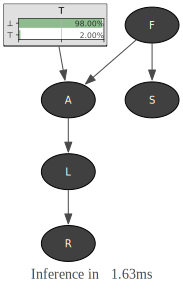

In [3]:
gnb.showInference(bn, evs={}, targets={'T'})

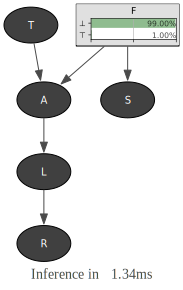

In [4]:
gnb.showInference(bn, evs={}, targets={'F'})

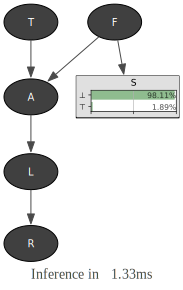

In [5]:
gnb.showInference(bn, evs={}, targets={'S'})

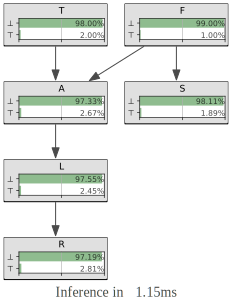

In [6]:
gnb.showInference(bn, evs={})

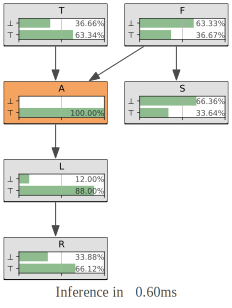

In [7]:
gnb.showInference(bn, evs={'A': y})

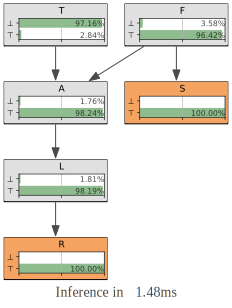

In [9]:
gnb.showInference(bn, evs={'R': y, 'S':y})